In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from picconfig import eventpath, phecatpath, timepath, humanpath, bchpath, temppath

In [2]:
bch=pd.read_csv(bchpath).dropna(how='all')

In [3]:
bchnp=bch.to_numpy()

In [4]:
ages=(np.array([ 60, 65, 70, 75, 80])).tolist()
haz=[]
for i in bchnp:
    if i[0] in ages:
        haz.append(i[1:])
ageyear = [60, 65, 70, 75, 80]
agename = []
for age in ageyear:
    agename.append(str(age) + " years old")

In [5]:
haz=np.array(haz)

In [6]:
cats='''Intestine,Digestive
Genital,Reproductive
Oral,Sensory
Upper digestive,Digestive
Digestive gland,Digestive
Bone and soft tissues,Tissues
Skin,Sensory
Urinary,Urinary
Eye,Sensory
CNS,Nervous
Endocrine,Endocrine
Blood,Circulatory
Vessel,Circulatory
Mental,Nervous
PNS,Nervous
Ear,Sensory
Heart,Circulatory
Upper respiratory,Respiratory
Lung,Respiratory
Pregnancy,Reproductive
Microbe,Externalities'''.split('\n')
catsd={}
for i in cats:
    if i.split(',')[1] in catsd.keys():
        catsd[i.split(',')[1]]+=[i.split(',')[0]]
    else:
        catsd[i.split(',')[1]]=[i.split(',')[0]]
phecat=np.load(phecatpath,allow_pickle=1)[0]
finalcat={}
for k,v in catsd.items():
    temp=[]
    for i in v:
        temp+=list(phecat[i])
    finalcat[k]=np.array(temp)
finalcat.keys()

dict_keys(['Digestive', 'Reproductive', 'Sensory', 'Tissues', 'Urinary', 'Nervous', 'Endocrine', 'Circulatory', 'Respiratory', 'Externalities'])

In [7]:
hazcat={}
for k,v in finalcat.items():
    hazcat[k]=np.nanmean(haz[:,v],axis=1)

In [8]:
minv=np.min(np.array(list(hazcat.values())))
maxv=np.max(np.array(list(hazcat.values())))
np.log(maxv/minv)

5.4525075824712514

In [9]:
for i in range(len(ages)):
    print(np.mean(np.array(list(hazcat.values()))[:,i]))

0.0006965167084328069
0.0014144412132520035
0.0028353363751141797
0.004923165377698078
0.0072578718587922465


In [10]:
orgdict={}
orgdict['Nervous']=(269,80)
orgdict['Circulatory']=(350,380)
orgdict['Respiratory']=(210,380)
orgdict['Urinary']=(270,750)
orgdict['Reproductive']=(330,800)
orgdict['Tissues']=(60,800)
orgdict['Sensory']=(200,110)
orgdict['Digestive']=(350,500)
orgdict['Endocrine']=(270,220)
orgdict['Externalities']=(500, 150)

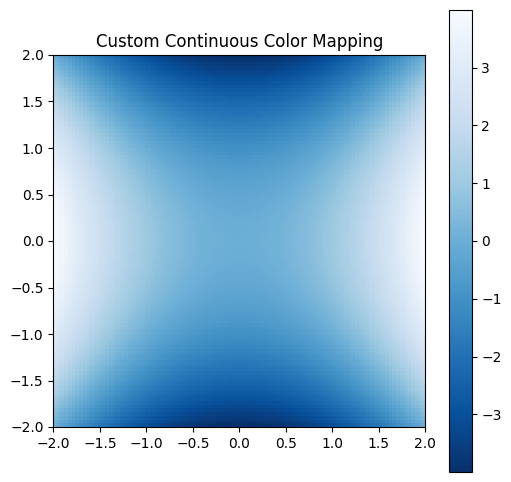

In [11]:
colors = [(64/255,57/255,144/255), (251/255,221/255,133/255), (207/255,67/255,62/255)] 
n_bins = [3]  
cmap_name = 'custom_map'

# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
# cmap = plt.get_cmap('Blues')
cmap = LinearSegmentedColormap.from_list('ReverseBlues', plt.cm.Blues(np.linspace(0, 1, 256))[::-1])

# Create a sample data
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(Z, interpolation='nearest', cmap=cmap, origin='lower', extent=[-2, 2, -2, 2])
plt.colorbar()
plt.title("Custom Continuous Color Mapping")
plt.show()

def value_to_rgb(value, colormap=cmap):
    normalized_value = value
    normalized_value = min(max(normalized_value, 0), 1) 
    return np.array(colormap(normalized_value)[:3],dtype=float)

In [12]:
ycount = np.load(eventpath)
ytime = np.load(timepath)

In [13]:
recordct = {}
for key, value in finalcat.items():
    recordct[key] = []
for i in ages[::-1]:
    index = np.where(ytime > i)
    ycount[index] = 0
    for key, value in finalcat.items():
        recordct[key].insert(0, np.nansum(ycount[:,value]))

In [14]:
recordct

{'Digestive': [139771.0, 240096.0, 373257.0, 501114.0, 570684.0],
 'Reproductive': [101624.0, 142289.0, 191656.0, 228779.0, 244760.0],
 'Sensory': [222124.0, 369410.0, 565275.0, 735548.0, 825916.0],
 'Tissues': [113811.0, 194280.0, 300045.0, 395664.0, 446451.0],
 'Urinary': [61035.0, 105632.0, 171865.0, 238348.0, 278372.0],
 'Nervous': [122650.0, 188263.0, 270922.0, 347917.0, 395378.0],
 'Endocrine': [84047.0, 146569.0, 233774.0, 319668.0, 371776.0],
 'Circulatory': [127672.0, 228869.0, 381760.0, 547713.0, 656695.0],
 'Respiratory': [74842.0, 122460.0, 186098.0, 247139.0, 283462.0],
 'Externalities': [54429.0, 86273.0, 125470.0, 155310.0, 168766.0]}

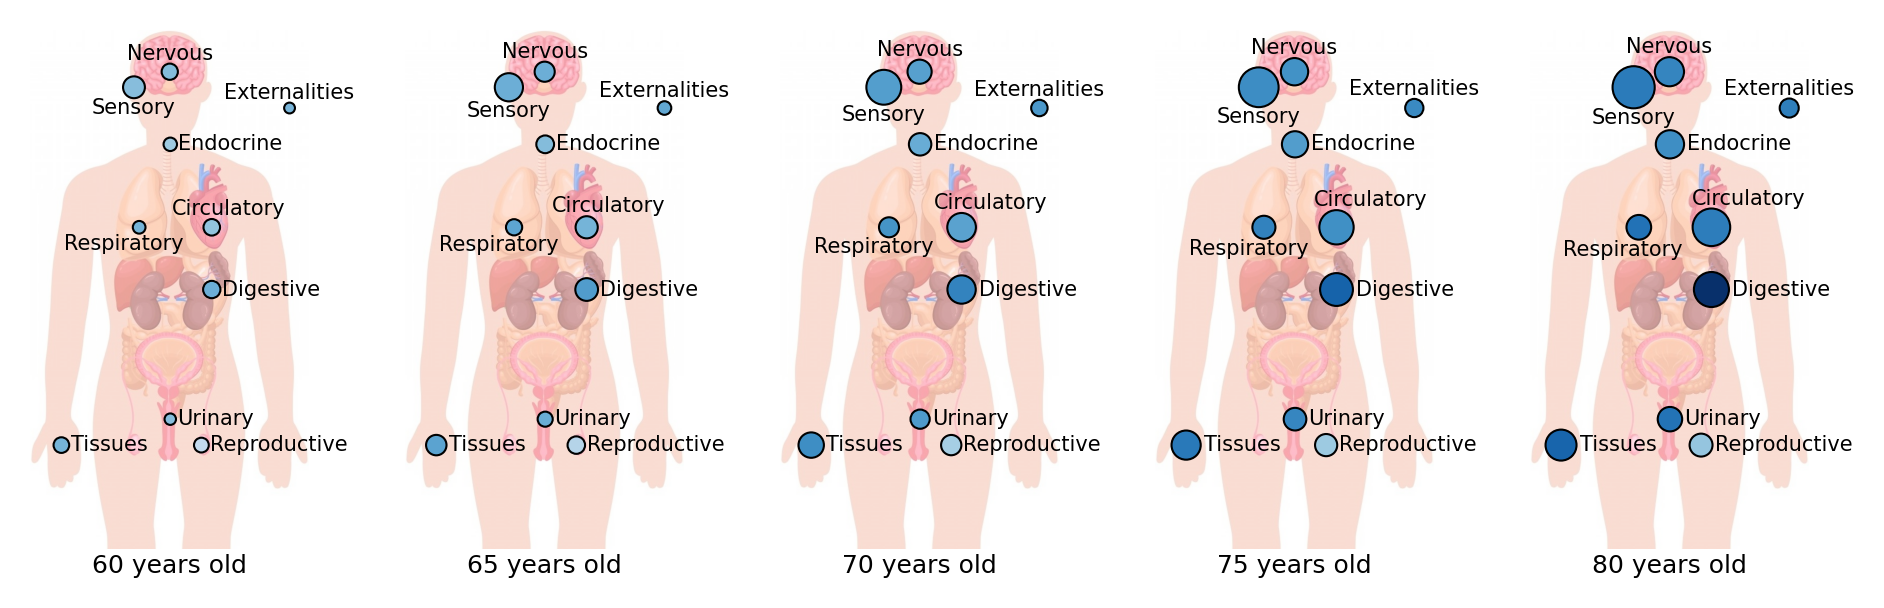

In [15]:
fontsize = 5
fig, axes = plt.subplots(nrows=1, ncols=5, dpi=300)
img = plt.imread(humanpath)
img=img[:1000,:,:]
yl = img.shape[0]
xl = img.shape[1]
for i,ax in enumerate(axes):
    ax.imshow(img, alpha=0.5)
    for k,v in hazcat.items():
        degree=np.sqrt(1-(10+np.log(v[i]/maxv))/10)
        color=np.array(value_to_rgb(degree)).tolist()
        size=np.sqrt(recordct[k][i]/500)
        circle = plt.Circle((orgdict[k][0], orgdict[k][1]), size, facecolor=color,edgecolor="black", fill=True, linewidth=0.5)
        ax.add_artist(circle)
        if k in ['Sensory']:
            ax.text(orgdict[k][0], orgdict[k][1]+size, k, ha='center', va='top', fontsize=fontsize)
        elif k in ['Circulatory']:
            ax.text(orgdict[k][0]+2*size, orgdict[k][1]-size, k, ha='center', va='bottom', fontsize=fontsize)
        elif k in ['Respiratory']:
            ax.text(orgdict[k][0]-30, orgdict[k][1]+size, k, ha='center', va='top', fontsize=fontsize)
        elif k in ['Nervous', 'Externalities']:
            ax.text(orgdict[k][0], orgdict[k][1]-1*size, k, ha='center', va='bottom', fontsize=fontsize)
        else:
            ax.text(orgdict[k][0]+1.2*size, orgdict[k][1], k, ha='left', va='center', fontsize=fontsize)
    ax.axis("off")
    ax.text(xl/2, yl+10, agename[i], fontsize = fontsize + 1, ha='center', va='top', fontweight=500)
plt.tight_layout()
plt.savefig(temppath + "human.pdf",bbox_inches="tight")
plt.show()